In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [2]:
def plot_all(model, x1, y1, x2, y2, rate):
    x   = np.linspace(-10, 70, 200)[:, None] * rate
    y   = np.linspace(-10, 70, 200)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()

    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    d = np.where(abs(mm2.T[0]) < 0.1)
    e = xx.T[0][d]
    f = yy.T[0][d]

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)


    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

    x2_ = (np.concatenate([np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2), np.ones(N2)*12]) ) * rate + 0.1 
    y2_ = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2)]) ) * rate + 0.1
    plt.plot(x2_, y2_, linewidth=5, c='black')
    
    plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5, c='red')
    plt.plot(x2_0, y2_0, linewidth=5, c='blue')
    plt.scatter(e,f, s=10, c='navy')
    # plt.scatter(e,f)
    #     plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

In [3]:
N1 = 10
N2 = 10
rate = 0.01 # data scale
%matplotlib inline

In [4]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) ) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) ) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1)*10, np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) ) * rate
y1_1 = (np.concatenate([np.ones(N1)*8, np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) ) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [5]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2), np.ones(N2)*12]) ) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2), np.ones(N2)*10]) ) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2)]) ) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2)]) ) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

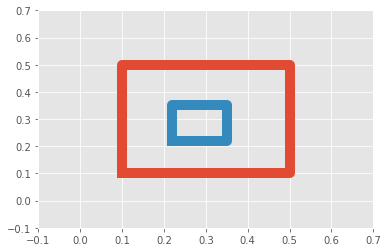

In [6]:
plt.plot(x1_0, y1_0, linewidth=10)
plt.plot(x2_0, y2_0, linewidth=10)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

# STEP1

In [7]:
step = 1
x2_0 = (np.concatenate([np.linspace(12, 25, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(10, 27, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2)*10]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

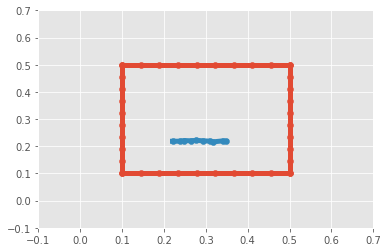

In [8]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [9]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[3.6812, 1.9175],
        [1.9175, 2.8814]])
sigma: tensor(-3.6615)
kernel: tensor([0.1833])
----- after learning -----
tensor([[3.6812, 1.9175],
        [1.9175, 2.8814]])


In [17]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[1.2775872, 0.6654839],
       [0.6654839, 1.       ]], dtype=float32)

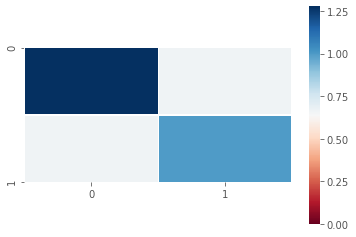

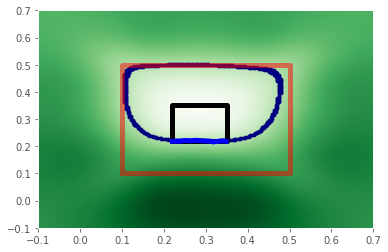

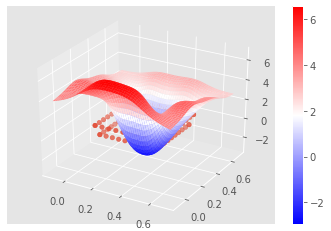

In [18]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

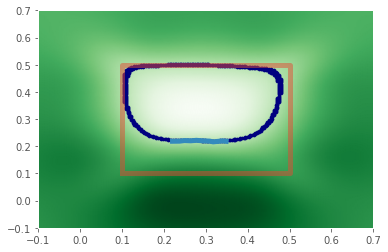

In [19]:
x   = np.linspace(-10, 70, 200)[:, None] * rate
y   = np.linspace(-10, 70, 200)[:, None] * rate
x,y = np.meshgrid(x, y)
xx  = x.ravel()[:, None]
yy  = y.ravel()[:, None]
XX  = np.concatenate([xx, yy], 1)
XX  = torch.from_numpy(XX).float()

mm1, ss1 = model.predict(XX, 0)
mm2, ss2 = model.predict(XX, 1)

d = np.where(abs(mm2.T[0]) < 0.1)
e = xx.T[0][d]
f = yy.T[0][d]

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)


mm1 = mm1.reshape(x.shape)
mm2 = mm2.reshape(x.shape)

z = mm2.numpy()

xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(e,f, s=10, c='navy')
# plt.scatter(e,f)
#     plt.colorbar(xyz)
# plt.savefig('mtgpis.png')
plt.show()

# STEP2

In [20]:
x2_0 = (np.concatenate([np.linspace(12, 25, N2), np.ones(N2)*25]) + np.random.randn(N2*2) * 0.2) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(12, 27, N2), np.ones(N2)*27]) + np.random.randn(N2*2) * 0.2) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2)]) + np.random.randn(N2*2) * 0.2) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 27, N2)]) + np.random.randn(N2*2) * 0.2) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*2), np.ones(N2*2)])[:, None]
T2 = 1

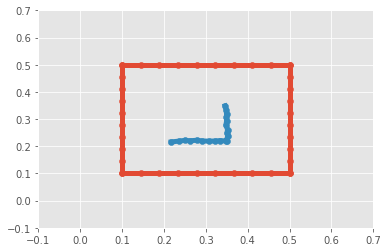

In [21]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [22]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[2.5598, 1.3174],
        [1.3174, 3.2574]])
sigma: tensor(-3.7704)
kernel: tensor([0.1632])
----- after learning -----
tensor([[2.5598, 1.3174],
        [1.3174, 3.2574]])


In [23]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.7858569, 0.4044388],
       [0.4044388, 1.       ]], dtype=float32)

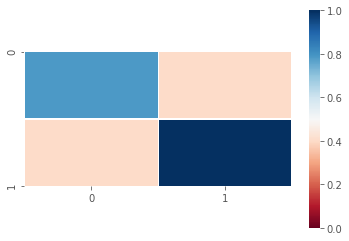

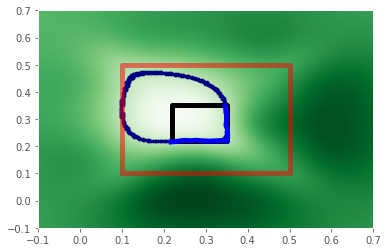

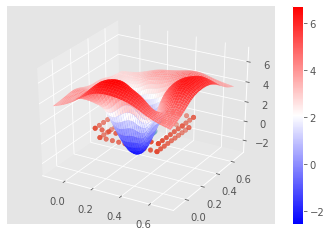

In [25]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP3

In [26]:
step = 3
x2_0 = (np.concatenate([np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2), np.ones(N2)*25]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 27, N2), np.ones(N2)*27]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

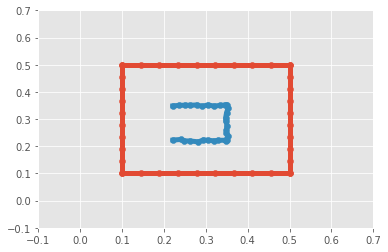

In [27]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [28]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[2.0017, 1.0751],
        [1.0751, 2.8084]])
sigma: tensor(-3.8207)
kernel: tensor([0.1509])
----- after learning -----
tensor([[2.0017, 1.0751],
        [1.0751, 2.8084]])


In [30]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.7127445, 0.3828047],
       [0.3828047, 1.       ]], dtype=float32)

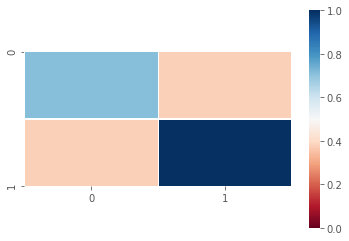

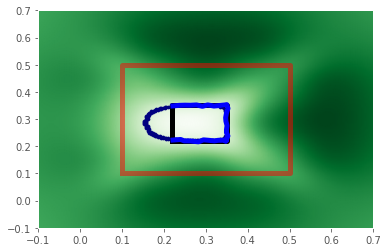

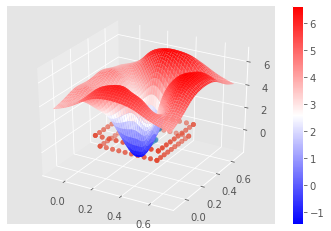

In [31]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)

# STEP4

In [32]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2), np.ones(N2)*12]) + np.random.randn(N2*step) * 0.2) * rate + 0.1 
x2_1 = (np.concatenate([np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2), np.ones(N2)*10]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2)]) + np.random.randn(N2*step) * 0.2) * rate + 0.1
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

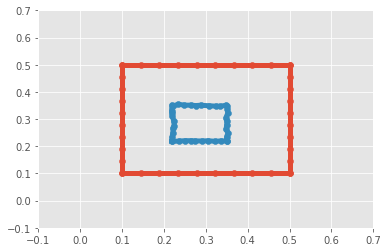

In [33]:
plt.plot(x1_0, y1_0, linewidth=5)
plt.plot(x2_0, y2_0, linewidth=5)
plt.scatter(x1_0, y1_0)
plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)
plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()

In [34]:
X1_t = torch.from_numpy(X1).float()
X2_t = torch.from_numpy(X2).float()
Y1_t = torch.from_numpy(Y1).float()
Y2_t = torch.from_numpy(Y2).float()

kernel = InverseMultiquadricKernelPytouch([0.001])
model  = MultiTaskGaussianProcessImplicitSurfaces([X1_t,X2_t], [Y1_t,Y2_t], [T1,T2], kernel)
print("----- before learning -----")
print(model.task_params_to_psd())
model.learning(max_iter=4000)
print("----- after learning -----")
print(model.task_params_to_psd())

----- before learning -----
tensor([[1.0020, 1.0020],
        [1.0020, 2.0040]])
task: tensor([[1.6297, 1.2116],
        [1.2116, 3.5658]])
sigma: tensor(-3.9168)
kernel: tensor([0.1405])
----- after learning -----
tensor([[1.6297, 1.2116],
        [1.2116, 3.5658]])


In [35]:
tmp = model.task_params_to_psd().numpy()
res = tmp/tmp[1][1]
res

array([[0.45702842, 0.33978614],
       [0.33978614, 1.        ]], dtype=float32)

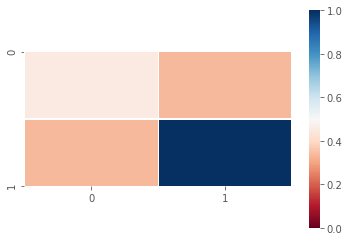

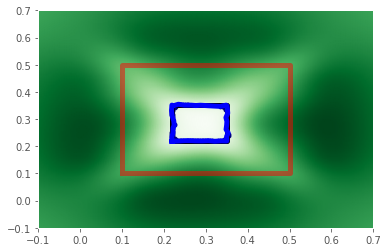

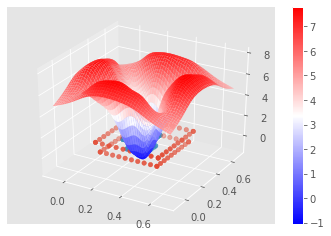

In [36]:
colormap = plt.cm.RdBu
sns.heatmap(res, linewidths=0.2, 
        square=True, cmap=colormap, linecolor='white', vmin=0)
plt.show()
plot_all(model, x1,y1,x2,y2, rate)